In [36]:
import pandas as pd

In [37]:
def classify_by_time(time):
    t = ""
    if time == 0:
        t = "00-01"
    elif time == 2:
        t = "02-03"
    elif time == 4:
        t = "04-05"
    elif time == 6:
        t = "06-07"
    elif time == 8:
        t = "08-09"
    elif time == 10:
        t = "10-11"
    elif time == 12:
        t = "12-13"
    elif time == 14:
        t = "14-15"
    elif time == 16:
        t = "16-17"
    elif time == 18:
        t = "18-19"
    elif time == 20:
        t = "20-21"
    elif time == 22:
        t = "22-23"
    add = "/Users/ma/Documents/bigdata/" + t + ".csv"
    gdata = pd.read_csv(add)
    geolong = pd.DataFrame(gdata['Pickup_longitude'])
    geolat = pd.DataFrame(gdata['Pickup_latitude'])
    geo = pd.DataFrame(gdata, columns=['Pickup_longitude', 'Pickup_latitude'])
    s = []
    i = 0
    for index, row in gdata.iterrows():
        temp = []
        temp.append((row['Pickup_longitude']+73)*100)
        temp.append((row['Pickup_latitude']-40)*100)
        s.append(temp)
        i = i + 1
    return s

In [38]:
d = classify_by_time(4)

In [39]:
d

[[-95.88699300000059, 71.48284900000021],
 [-86.76681500000001, 74.94087199999981],
 [-93.79272500000013, 84.84764100000035],
 [-90.4609679999993, 74.5437619999997],
 [-96.18835400000023, 80.53855900000002],
 [-88.53454599999964, 74.75128199999972],
 [-86.35253900000066, 75.16021699999982],
 [-95.0050349999998, 72.21221900000003],
 [-95.29952999999978, 79.16526799999986],
 [-95.78094499999992, 71.45538299999998],
 [-93.26324499999998, 71.39434799999975],
 [-89.5332339999996, 74.65972899999969],
 [-86.17553699999974, 75.00762900000026],
 [-91.02706900000044, 77.57797200000027],
 [-88.29803499999969, 74.77722200000017],
 [-93.77136199999967, 80.45425399999999],
 [-99.14550799999944, 69.60754400000013],
 [-94.9371339999999, 71.3924409999997],
 [-93.78509499999979, 84.3524930000001],
 [-88.23089600000031, 74.78675799999976],
 [-88.62762499999945, 74.74479700000032],
 [-92.19665499999934, 70.92819200000022],
 [-92.01965299999983, 74.31182899999982],
 [-99.06387300000006, 68.65615800000029],

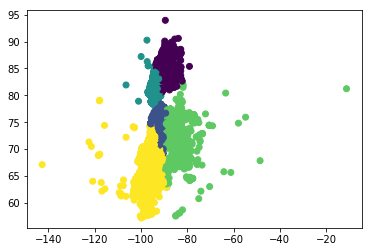

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

coordinates= np.array(d)
x, y = kmeans2(whiten(coordinates), 5, iter = 200)  
plt.scatter(coordinates[:,0], coordinates[:,1], c=y);
plt.show()

In [41]:
# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

Number of clusters: 19


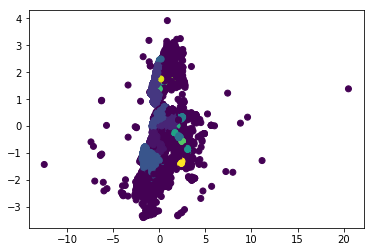

In [42]:
X = StandardScaler().fit_transform(d)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(d)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))

